## 보스턴 주택 가격 예측
* 보스턴 주택 가격 데이터세트(Boston Housing Dataset) 사용
- [data 관련 참고 사이트](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)

In [4]:
import tensorflow as tf
tf.__version__

'2.0.0'

### 데이터 불러오기

In [1]:
from ________________ import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

57344/57026 [==============================] - 0s 2us/step
404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


### 데이터 전처리(정규화)
- ### 정규화 : $Z = {{X - \bar{X}} \over \sigma}$

In [2]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


### Boston Housing Dataset 회귀 모델 생성

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


### 회귀 모델 학습

In [6]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 2.7431 - val_loss: 0.8966
Epoch 2/25
303/303 [==============================] - 0s 109us/sample - loss: 0.4545 - val_loss: 0.8365
Epoch 3/25
303/303 [==============================] - 0s 109us/sample - loss: 0.4266 - val_loss: 0.5051
Epoch 4/25
303/303 [==============================] - 0s 112us/sample - loss: 0.2613 - val_loss: 0.7449
Epoch 5/25
303/303 [==============================] - 0s 112us/sample - loss: 0.3603 - val_loss: 0.4085
Epoch 6/25
303/303 [==============================] - 0s 118us/sample - loss: 0.2654 - val_loss: 0.2212
Epoch 7/25
303/303 [==============================] - 0s 99us/sample - loss: 0.1463 - val_loss: 0.2034
Epoch 8/25
303/303 [==============================] - 0s 118us/sample - loss: 0.1218 - val_loss: 0.1572
Epoch 9/25
303/303 [==============================] - 0s 102us/sample - loss: 0.0902 - val_loss: 0.1585
Epoch 10/25
303/303 [

### 회귀 모델 학습 결과 시각화

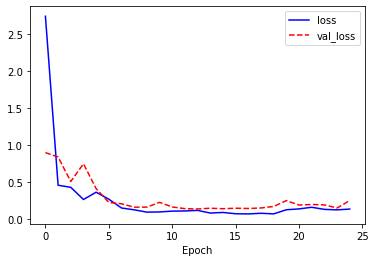

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 실제 주택 가격과 예측 주택 가격 시각화

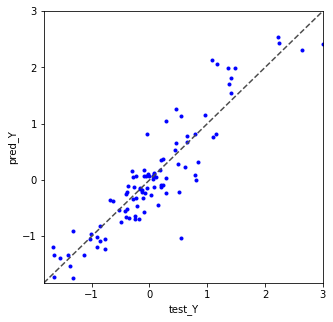

In [8]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

### 모델 재정의 및 학습

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[________________(patience=3, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 1ms/sample - loss: 4.2011 - val_loss: 0.9811
Epoch 2/25
303/303 [==============================] - 0s 102us/sample - loss: 0.5750 - val_loss: 0.9474
Epoch 3/25
303/303 [==============================] - 0s 99us/sample - loss: 0.4576 - val_loss: 0.7413
Epoch 4/25
303/303 [==============================] - 0s 109us/sample - loss: 0.3591 - val_loss: 0.4959
Epoch 5/25
303/303 [==============================] - 0s 99us/sample - loss: 0.2866 - val_loss: 0.4033
Epoch 6/25
303/303 [==============================] - 0s 112us/sample - loss: 0.2181 - val_loss: 0.3339
Epoch 7/25
303/303 [==============================] - 0s 109us/sample - loss: 0.1678 - val_loss: 0.3520
Epoch 8/25
303/303 [==============================] - 0s 102us/sample - loss: 0.1984 - val_loss: 0.2270
Epoch 9/25
303/303 [==============================] - 0s 112us/sample - loss: 0.1497 - val_loss: 0.2188
Epoch 10/25
303/303 [=

### 회귀 모델 학습 결과 시각화

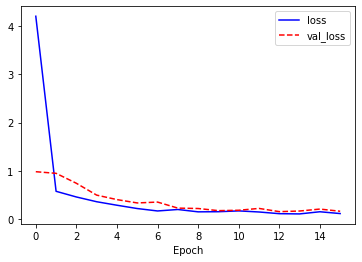

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 회귀 모델 평가

In [11]:
model.evaluate(test_X, test_Y)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.20541122964784211

### 실제 주택 가격과 예측 주택 가격 시각화

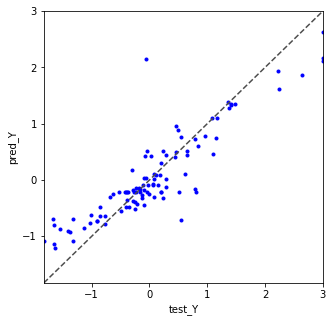

In [12]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()